In [765]:
# data import and analysis
import numpy as np
import pandas as pd
import random as rnd
# data visualization
import matplotlib.pyplot as plt
import seaborn as sns
# machine learning 
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [766]:
# import data
train_df = pd.read_csv('/home/manoj/Desktop/assignment/credit.csv')

In [767]:
# obtaining class labels 
train_df['default'] = train_df['default'].map({'yes':1,'no':0})

In [768]:
# describe data
print(train_df.columns.values)

['checking_balance' 'months_loan_duration' 'credit_history' 'purpose'
 'amount' 'savings_balance' 'employment_duration' 'percent_of_income'
 'years_at_residence' 'age' 'other_credit' 'housing'
 'existing_loans_count' 'job' 'dependents' 'phone' 'default']


In [769]:
# view some data
train_df.head()

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,other_credit,housing,existing_loans_count,job,dependents,phone,default
0,< 0 DM,6,critical,furniture/appliances,1169,unknown,> 7 years,4,4,67,none,own,2,skilled,1,yes,0
1,1 - 200 DM,48,good,furniture/appliances,5951,< 100 DM,1 - 4 years,2,2,22,none,own,1,skilled,1,no,1
2,unknown,12,critical,education,2096,< 100 DM,4 - 7 years,2,3,49,none,own,1,unskilled,2,no,0
3,< 0 DM,42,good,furniture/appliances,7882,< 100 DM,4 - 7 years,2,4,45,none,other,1,skilled,2,no,0
4,< 0 DM,24,poor,car,4870,< 100 DM,1 - 4 years,3,4,53,none,other,2,skilled,2,no,1


In [770]:
# which features contain null, blanck values
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
checking_balance        1000 non-null object
months_loan_duration    1000 non-null int64
credit_history          1000 non-null object
purpose                 1000 non-null object
amount                  1000 non-null int64
savings_balance         1000 non-null object
employment_duration     1000 non-null object
percent_of_income       1000 non-null int64
years_at_residence      1000 non-null int64
age                     1000 non-null int64
other_credit            1000 non-null object
housing                 1000 non-null object
existing_loans_count    1000 non-null int64
job                     1000 non-null object
dependents              1000 non-null int64
phone                   1000 non-null object
default                 1000 non-null int64
dtypes: int64(8), object(9)
memory usage: 132.9+ KB


In [771]:
# distribution of numerical featurea among dataset
train_df.describe()

,months_loan_duration,amount,percent_of_income,years_at_residence,age,existing_loans_count,dependents,default
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000,0.300000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086,0.458487
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000,0.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000,0.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000,0.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000,1.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000,1.000000


In [772]:
# distribution of categorical features among dataset
train_df.describe(include=['O'])

,checking_balance,credit_history,purpose,savings_balance,employment_duration,other_credit,housing,job,phone
count,1000,1000,1000,1000,1000,1000,1000,1000,1000
unique,4,5,6,5,5,3,3,4,2
top,unknown,good,furniture/appliances,< 100 DM,1 - 4 years,none,own,skilled,no
freq,394,530,473,603,339,814,713,630,596


In [773]:
# correlation of phone features with labels
train_df[['phone','default']].groupby(['phone']).mean()

,default
phone,
no,0.313758
yes,0.279703


this showa there is not too much correlation between person carrying phone and are defaulter, so we can drop this phone feature from dataset.

In [774]:
# drop phone feature
train_df = train_df.drop(['phone'],axis=1)

In [775]:
train_df.head()

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,other_credit,housing,existing_loans_count,job,dependents,default
0,< 0 DM,6,critical,furniture/appliances,1169,unknown,> 7 years,4,4,67,none,own,2,skilled,1,0
1,1 - 200 DM,48,good,furniture/appliances,5951,< 100 DM,1 - 4 years,2,2,22,none,own,1,skilled,1,1
2,unknown,12,critical,education,2096,< 100 DM,4 - 7 years,2,3,49,none,own,1,unskilled,2,0
3,< 0 DM,42,good,furniture/appliances,7882,< 100 DM,4 - 7 years,2,4,45,none,other,1,skilled,2,0
4,< 0 DM,24,poor,car,4870,< 100 DM,1 - 4 years,3,4,53,none,other,2,skilled,2,1


In [776]:
# correlation of job features with labels
train_df[['job','default']].groupby(['job']).mean()

,default
job,
management,0.344595
skilled,0.295238
unemployed,0.318182
unskilled,0.280000


In [777]:
# map job feature category into numeric value
train_df['job'] = train_df['job'].map({'management':1,'skilled':2,'unemployed':3,'unskilled':4})

In [778]:
# correlation of housing features with labels
train_df[['housing','default']].groupby(['housing']).mean()

,default
housing,
other,0.407407
own,0.260870
rent,0.391061


In [779]:
# map housing feature category into numeric value
train_df['housing'] = train_df['housing'].map({'other':1,'rent':1,'own':0})

In [780]:
train_df.head()

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,other_credit,housing,existing_loans_count,job,dependents,default
0,< 0 DM,6,critical,furniture/appliances,1169,unknown,> 7 years,4,4,67,none,0,2,2,1,0
1,1 - 200 DM,48,good,furniture/appliances,5951,< 100 DM,1 - 4 years,2,2,22,none,0,1,2,1,1
2,unknown,12,critical,education,2096,< 100 DM,4 - 7 years,2,3,49,none,0,1,4,2,0
3,< 0 DM,42,good,furniture/appliances,7882,< 100 DM,4 - 7 years,2,4,45,none,1,1,2,2,0
4,< 0 DM,24,poor,car,4870,< 100 DM,1 - 4 years,3,4,53,none,1,2,2,2,1


In [781]:
# correlation of ther credit features with labels
train_df[['other_credit','default']].groupby(['other_credit']).mean()

,default
other_credit,
bank,0.410072
none,0.275184
store,0.404255


In [782]:
# map other credit feature category into numeric value
train_df['other_credit'] = train_df['other_credit'].map({'bank':1,'store':1,'none':0})

In [783]:
train_df.head()

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,other_credit,housing,existing_loans_count,job,dependents,default
0,< 0 DM,6,critical,furniture/appliances,1169,unknown,> 7 years,4,4,67,0,0,2,2,1,0
1,1 - 200 DM,48,good,furniture/appliances,5951,< 100 DM,1 - 4 years,2,2,22,0,0,1,2,1,1
2,unknown,12,critical,education,2096,< 100 DM,4 - 7 years,2,3,49,0,0,1,4,2,0
3,< 0 DM,42,good,furniture/appliances,7882,< 100 DM,4 - 7 years,2,4,45,0,1,1,2,2,0
4,< 0 DM,24,poor,car,4870,< 100 DM,1 - 4 years,3,4,53,0,1,2,2,2,1


In [784]:
# correlation of employment_duration features with labels
train_df[['employment_duration','default']].groupby(['employment_duration']).mean()

,default
employment_duration,
1 - 4 years,0.306785
4 - 7 years,0.224138
< 1 year,0.406977
> 7 years,0.252964
unemployed,0.370968


In [785]:
# map other employment_duration feature category into numeric value
train_df['employment_duration'] = train_df['employment_duration'].map({'1 - 4 years':1,'< 1 year':1,'4 - 7 years':0,'> 7 years':0,'unemployed':1})

In [786]:
train_df.head()

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,other_credit,housing,existing_loans_count,job,dependents,default
0,< 0 DM,6,critical,furniture/appliances,1169,unknown,0,4,4,67,0,0,2,2,1,0
1,1 - 200 DM,48,good,furniture/appliances,5951,< 100 DM,1,2,2,22,0,0,1,2,1,1
2,unknown,12,critical,education,2096,< 100 DM,0,2,3,49,0,0,1,4,2,0
3,< 0 DM,42,good,furniture/appliances,7882,< 100 DM,0,2,4,45,0,1,1,2,2,0
4,< 0 DM,24,poor,car,4870,< 100 DM,1,3,4,53,0,1,2,2,2,1


In [787]:
# correlation of saving_balance features with labels
train_df[['savings_balance','default']].groupby(['savings_balance']).mean()

,default
savings_balance,
100 - 500 DM,0.330097
500 - 1000 DM,0.174603
< 100 DM,0.359867
> 1000 DM,0.125000
unknown,0.174863


In [788]:
# map other saving_balance feature category into numeric value
train_df['savings_balance'] = train_df['savings_balance'].map({'100 - 500 DM':1,'< 100 DM':1,'500 - 1000 DM':0,'> 1000 DM':0,'unknown':0})

In [789]:
train_df.head()

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,other_credit,housing,existing_loans_count,job,dependents,default
0,< 0 DM,6,critical,furniture/appliances,1169,0,0,4,4,67,0,0,2,2,1,0
1,1 - 200 DM,48,good,furniture/appliances,5951,1,1,2,2,22,0,0,1,2,1,1
2,unknown,12,critical,education,2096,1,0,2,3,49,0,0,1,4,2,0
3,< 0 DM,42,good,furniture/appliances,7882,1,0,2,4,45,0,1,1,2,2,0
4,< 0 DM,24,poor,car,4870,1,1,3,4,53,0,1,2,2,2,1


In [790]:
# correlation of purpose features with labels
train_df[['purpose','default']].groupby(['purpose']).mean()

,default
purpose,
business,0.350515
car,0.314540
car0,0.416667
education,0.389831
furniture/appliances,0.262156
renovations,0.363636


In [791]:
# map other purpose feature category into numeric value
train_df['purpose'] = train_df['purpose'].map({'business':1,'car':2,'car0':3,'education':4,'furniture/appliances':5,'renovations':6})

In [792]:
train_df.head()

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,other_credit,housing,existing_loans_count,job,dependents,default
0,< 0 DM,6,critical,5,1169,0,0,4,4,67,0,0,2,2,1,0
1,1 - 200 DM,48,good,5,5951,1,1,2,2,22,0,0,1,2,1,1
2,unknown,12,critical,4,2096,1,0,2,3,49,0,0,1,4,2,0
3,< 0 DM,42,good,5,7882,1,0,2,4,45,0,1,1,2,2,0
4,< 0 DM,24,poor,2,4870,1,1,3,4,53,0,1,2,2,2,1


In [793]:
# correlation of credit_history features with labels
train_df[['credit_history','default']].groupby(['credit_history']).mean()

,default
credit_history,
critical,0.170648
good,0.318868
perfect,0.625000
poor,0.318182
very good,0.571429


In [794]:
# map other credit_history feature category into numeric value
train_df['credit_history'] = train_df['credit_history'].map({'critical':1,'good':2,'perfect':3,'poor':4,'very good':5})

In [795]:
train_df.head()

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,other_credit,housing,existing_loans_count,job,dependents,default
0,< 0 DM,6,1,5,1169,0,0,4,4,67,0,0,2,2,1,0
1,1 - 200 DM,48,2,5,5951,1,1,2,2,22,0,0,1,2,1,1
2,unknown,12,1,4,2096,1,0,2,3,49,0,0,1,4,2,0
3,< 0 DM,42,2,5,7882,1,0,2,4,45,0,1,1,2,2,0
4,< 0 DM,24,4,2,4870,1,1,3,4,53,0,1,2,2,2,1


In [796]:
# correlation of checking_balance features with labels
train_df[['checking_balance','default']].groupby(['checking_balance']).mean()

,default
checking_balance,
1 - 200 DM,0.390335
< 0 DM,0.492701
> 200 DM,0.222222
unknown,0.116751


In [797]:
# map other checking_balance feature category into numeric value
train_df['checking_balance']= train_df['checking_balance'].map({'1 - 200 DM':1,'< 0 DM':1,'> 200 DM':0,'unknown':0})

In [798]:
train_df.head()

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,other_credit,housing,existing_loans_count,job,dependents,default
0,1,6,1,5,1169,0,0,4,4,67,0,0,2,2,1,0
1,1,48,2,5,5951,1,1,2,2,22,0,0,1,2,1,1
2,0,12,1,4,2096,1,0,2,3,49,0,0,1,4,2,0
3,1,42,2,5,7882,1,0,2,4,45,0,1,1,2,2,0
4,1,24,4,2,4870,1,1,3,4,53,0,1,2,2,2,1


In [799]:
# correlation of checking_balance features with labels
train_df[['percent_of_income','default']].groupby(['percent_of_income']).mean()

,default
percent_of_income,
1,0.250000
2,0.268398
3,0.286624
4,0.334034


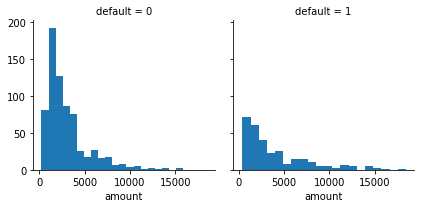

In [800]:
# distribution of default with respet to amount
g = sns.FacetGrid(train_df,col= 'default')
g.map(plt.hist,'amount',bins = 20)

In [801]:
# divide the amount into amount band 
train_df['amountband'] = pd.cut(train_df['amount'], 5)
train_df[['amountband', 'default']].groupby(['amountband'], as_index=False).mean().sort_values(by='amountband', ascending=True)

,amountband,default
0,"(231.826, 3884.8]",0.256098
1,"(3884.8, 7519.6]",0.384181
2,"(7519.6, 11154.4]",0.403509
3,"(11154.4, 14789.2]",0.727273
4,"(14789.2, 18424.0]",0.666667


In [802]:
# categories amount into numerical value according to amount band
train_df.loc[train_df['amount']<3884.8,'amount'] =1
train_df.loc[(train_df['amount'] > 3884.8) & (train_df['amount'] <= 7519.6), 'amount'] = 2
train_df.loc[(train_df['amount'] > 7519.6) & (train_df['age'] <= 11154.4), 'amount'] = 3
train_df.loc[(train_df['amount'] > 11154.4) & (train_df['age'] <= 14789.2), 'amount'] = 4
train_df.loc[ train_df['amount'] > 14789.2, 'amount']= 5

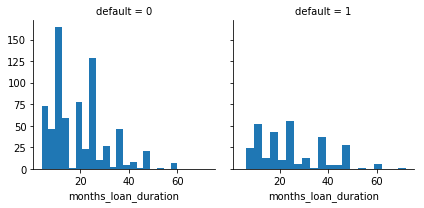

In [803]:
# distribution of default with respet to months_loan_duration
g = sns.FacetGrid(train_df,col= 'default')
g.map(plt.hist,'months_loan_duration',bins = 20)

In [804]:
# divide the amount into 5 duration band 
train_df['durationband'] = pd.cut(train_df['months_loan_duration'], 5)
train_df[['durationband','default']].groupby(['durationband'], as_index=False).mean().sort_values(by='durationband', ascending=True)

,durationband,default
0,"(3.932, 17.6]",0.207852
1,"(17.6, 31.2]",0.322335
2,"(31.2, 44.8]",0.417476
3,"(44.8, 58.4]",0.589286
4,"(58.4, 72.0]",0.500000


In [805]:
# categories months_loan_duration into numerical value according to duration band
train_df.loc[train_df['months_loan_duration']<17.6,'months_loan_duration'] =1
train_df.loc[(train_df['months_loan_duration'] > 17.6) & (train_df['months_loan_duration'] <= 31.2), 'months_loan_duration'] = 2
train_df.loc[(train_df['months_loan_duration'] > 31.2) & (train_df['months_loan_duration'] <= 44.8), 'months_loan_duration'] = 3
train_df.loc[(train_df['months_loan_duration'] > 44.8) & (train_df['months_loan_duration'] <= 58.4), 'months_loan_duration'] = 4
train_df.loc[ train_df['months_loan_duration'] > 58.4, 'months_loan_duration']= 5

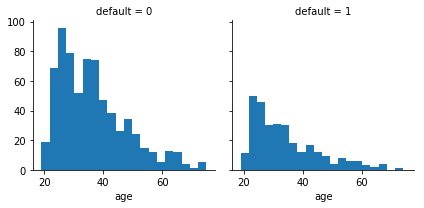

In [806]:
## distribution of default with respet to age
g = sns.FacetGrid(train_df,col= 'default')
g.map(plt.hist,'age',bins = 20)

In [807]:
# divide age into 5 age band
train_df['ageband'] = pd.cut(train_df['age'], 5)
train_df[['ageband', 'default']].groupby(['ageband'], as_index=False).mean().sort_values(by='ageband', ascending=True)

,ageband,default
0,"(18.944, 30.2]",0.360097
1,"(30.2, 41.4]",0.253012
2,"(41.4, 52.6]",0.242236
3,"(52.6, 63.8]",0.338235
4,"(63.8, 75.0]",0.214286


In [808]:
# categories age into numerical value according to age band
train_df.loc[train_df['age']<30.2,'age'] =1
train_df.loc[(train_df['age'] > 30.2) & (train_df['age'] <= 41.4), 'age'] = 2
train_df.loc[(train_df['age'] > 41.4) & (train_df['age'] <= 52.6), 'age'] = 3
train_df.loc[(train_df['age'] > 52.6) & (train_df['age'] <= 63.8), 'age'] = 4
train_df.loc[ train_df['age'] > 63.8, 'age']=5

In [809]:
# remove ageband, amountband and durationband feature from dataset
train_df = train_df.drop(['ageband'],axis=1)
train_df = train_df.drop(['amountband'],axis=1)
train_df = train_df.drop(['durationband'],axis=1)

In [810]:
train_df.head()

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,other_credit,housing,existing_loans_count,job,dependents,default
0,1,1,1,5,1,0,0,4,4,5,0,0,2,2,1,0
1,1,4,2,5,2,1,1,2,2,1,0,0,1,2,1,1
2,0,1,1,4,1,1,0,2,3,3,0,0,1,4,2,0
3,1,3,2,5,3,1,0,2,4,3,0,1,1,2,2,0
4,1,2,4,2,2,1,1,3,4,4,0,1,2,2,2,1


In [811]:
# Model , predict 


    Logistic Regression
    KNN or k-Nearest Neighbors
    Support Vector Machines
    Naive Bayes classifier
    Decision Tree
    Random Forrest
    Artificial neural network


In [812]:
# divide the data into training and testing data
X = train_df.drop("default", axis=1)
Y = train_df["default"]
X_train  = X.loc[:800,:]
Y_train = Y.loc[:800]
X_test  = X.loc[800:,:]
Y_test = Y.loc[800:]
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape


((801, 15), (801,), (200, 15), (200,))

In [813]:
# Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
acc_log

74.91

In [814]:
# Support Vector Machines
svc = SVC()
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, Y_train) * 100, 2)
acc_svc



80.65

In [815]:
# KNN
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
acc_knn

83.27

In [816]:
# Gaussian Naive Bayes
gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)
acc_gaussian

73.66

In [817]:
# Linear SVC
linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)
Y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)
acc_linear_svc

75.78

In [818]:
# Stochastic Gradient Descent
sgd = SGDClassifier()
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)
acc_sgd

/home/manoj/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


70.41

In [819]:
# Decision Tree
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
acc_decision_tree

98.88

In [820]:
# Random Forest
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

98.88

In [821]:
# comparision of different models
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree'],
    'Score': [acc_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, 
              acc_sgd, acc_linear_svc, acc_decision_tree]})
models.sort_values(by='Score', ascending=False)

,Model,Score
3,Random Forest,98.88
7,Decision Tree,98.88
1,KNN,83.27
0,Support Vector Machines,80.65
6,Linear SVC,75.78
2,Logistic Regression,74.91
4,Naive Bayes,73.66
5,Stochastic Gradient Decent,70.41
